In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("data/ech_apprentissage.csv", sep = ';', index_col = 'id', low_memory = False)
X = train.drop('prime_tot_ttc', axis = 1)
y = train.prime_tot_ttc
X_test = pd.read_csv('data/ech_test.csv', sep = ';', index_col = 'id', low_memory = False)

In [3]:
df = pd.concat([X, X_test], axis=0)

In [4]:
cat_variables = [i for i in df.columns if df[i].dtype == 'O']
num_variables = [i for i in df.columns if df[i].dtype != 'O']

In [5]:
df.corr()

,annee_naissance,annee_permis,puis_fiscale,anc_veh,kmage_annuel,crm,var1,var2,var3,var4,...,var11,var12,var13,var15,var17,var18,var19,var20,var21,var22
annee_naissance,1.000000,0.996143,-0.398639,0.019380,-0.226223,0.090048,-0.996143,0.001054,-0.012797,0.001607,...,0.019483,-0.211251,0.016517,-0.008414,0.004960,0.003789,0.002739,0.003463,0.003881,0.001245
annee_permis,0.996143,1.000000,-0.397199,0.019577,-0.225365,0.089981,-1.000000,0.000946,-0.013068,0.001531,...,0.019686,-0.210426,0.016416,-0.008516,0.005102,0.003490,0.002769,0.003800,0.003798,0.001299
puis_fiscale,-0.398639,-0.397199,1.000000,-0.048875,0.550662,-0.220577,0.397199,-0.006038,0.030855,-0.000201,...,-0.048911,0.502540,-0.049966,0.020973,0.001691,-0.002109,-0.002368,-0.002763,-0.004814,-0.000959
anc_veh,0.019380,0.019577,-0.048875,1.000000,-0.047073,0.194077,-0.019577,0.084763,-0.464505,0.001718,...,0.999000,-0.045668,-0.023700,-0.087719,-0.006501,0.006293,-0.000468,0.007906,0.002668,0.004622
kmage_annuel,-0.226223,-0.225365,0.550662,-0.047073,1.000000,-0.224395,0.225365,-0.026452,0.024888,0.001566,...,-0.046971,0.908860,0.211771,0.057796,0.000751,-0.005235,0.000025,0.001346,-0.002637,-0.000589
crm,0.090048,0.089981,-0.220577,0.194077,-0.224395,1.000000,-0.089981,0.142801,-0.087593,-0.000959,...,0.193985,-0.212965,-0.038970,-0.014027,0.003771,-0.007480,0.000659,0.002201,0.003727,-0.002629
var1,-0.996143,-1.000000,0.397199,-0.019577,0.225365,-0.089981,1.000000,-0.000946,0.013068,-0.001531,...,-0.019686,0.210426,-0.016416,0.008516,-0.005102,-0.003490,-0.002769,-0.003800,-0.003798,-0.001299
var2,0.001054,0.000946,-0.006038,0.084763,-0.026452,0.142801,-0.000946,1.000000,-0.075047,0.000438,...,0.084833,-0.029169,-0.024901,0.023020,0.000599,0.000517,-0.002665,-0.000222,0.002383,0.004090
var3,-0.012797,-0.013068,0.030855,-0.464505,0.024888,-0.087593,0.013068,-0.075047,1.000000,-0.002824,...,-0.465736,0.026255,0.024712,0.024436,0.000286,-0.001876,-0.002643,-0.003683,0.000446,-0.003142
var4,0.001607,0.001531,-0.000201,0.001718,0.001566,-0.000959,-0.001531,0.000438,-0.002824,1.000000,...,0.001792,0.001910,0.001447,-0.002747,0.001802,-0.002051,0.000607,-0.000943,-0.001894,0.000338


In [7]:
print(num_variables)

['annee_naissance', 'annee_permis', 'puis_fiscale', 'anc_veh', 'kmage_annuel', 'crm', 'var1', 'var2', 'var3', 'var4', 'var5', 'var9', 'var10', 'var11', 'var12', 'var13', 'var15', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22']


## `annee_naissance`

In [9]:
print(df.loc[:, num_variables].corrwith(df.annee_naissance).sort_values())

var1              -0.996143
puis_fiscale      -0.398639
var9              -0.318818
kmage_annuel      -0.226223
var12             -0.211251
var10             -0.095516
var3              -0.012797
var15             -0.008414
var2               0.001054
var22              0.001245
var4               0.001607
var19              0.002739
var20              0.003463
var18              0.003789
var21              0.003881
var17              0.004960
var13              0.016517
anc_veh            0.019380
var11              0.019483
var5               0.052380
crm                0.090048
annee_permis       0.996143
annee_naissance    1.000000
dtype: float64


Коррелирует с `var1`, `annee_permis`, `var9`, `puis_fiscale`.

## `annee_permis`

In [10]:
print(df.loc[:, num_variables].corrwith(df.annee_naissance).sort_values())

var1              -0.996143
puis_fiscale      -0.398639
var9              -0.318818
kmage_annuel      -0.226223
var12             -0.211251
var10             -0.095516
var3              -0.012797
var15             -0.008414
var2               0.001054
var22              0.001245
var4               0.001607
var19              0.002739
var20              0.003463
var18              0.003789
var21              0.003881
var17              0.004960
var13              0.016517
anc_veh            0.019380
var11              0.019483
var5               0.052380
crm                0.090048
annee_permis       0.996143
annee_naissance    1.000000
dtype: float64


## `puis_fiscale`

In [11]:
print(df.loc[:, num_variables].corrwith(df.puis_fiscale).sort_values())

annee_naissance   -0.398639
annee_permis      -0.397199
crm               -0.220577
var5              -0.136142
var13             -0.049966
var11             -0.048911
anc_veh           -0.048875
var2              -0.006038
var21             -0.004814
var20             -0.002763
var19             -0.002368
var18             -0.002109
var22             -0.000959
var4              -0.000201
var17              0.001691
var15              0.020973
var3               0.030855
var10              0.257218
var1               0.397199
var12              0.502540
kmage_annuel       0.550662
var9               0.803391
puis_fiscale       1.000000
dtype: float64


## `anc_veh`

In [12]:
print(df.loc[:, num_variables].corrwith(df.anc_veh).sort_values())

var3              -0.464505
var15             -0.087719
var5              -0.053058
puis_fiscale      -0.048875
kmage_annuel      -0.047073
var12             -0.045668
var9              -0.045246
var13             -0.023700
var1              -0.019577
var17             -0.006501
var10             -0.001946
var19             -0.000468
var4               0.001718
var21              0.002668
var22              0.004622
var18              0.006293
var20              0.007906
annee_naissance    0.019380
annee_permis       0.019577
var2               0.084763
crm                0.194077
var11              0.999000
anc_veh            1.000000
dtype: float64


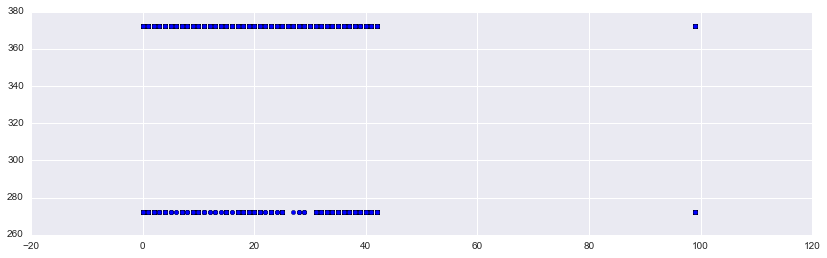

In [21]:
plt.figure(figsize = (14, 4))
plt.scatter(df.anc_veh, df.var3);

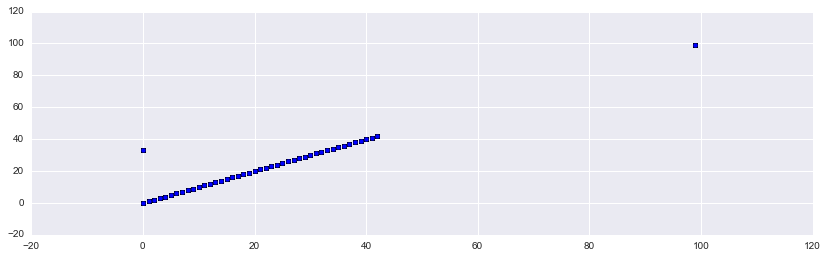

In [20]:
plt.figure(figsize = (14, 4))
plt.scatter(df.anc_veh, df.var11);

In [13]:
df[df.anc_veh != df.var11]

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
2548,1993.0,2012.0,RENAULT,5,0,1238,gazole,6308,61,artisan,...,5,A,2,NR,1,26,0,1,1,2
3240,1975.0,1994.0,MERCEDES,9,0,1354,essence,17000,95,artisan,...,5,B,2,NR,1,25,1,1,1,0
3821,1987.0,2007.0,PEUGEOT,6,0,2064,gazole,7216,100,artisan,...,5,D,2,NR,1,26,0,1,1,1
3917,1985.0,2004.0,CITROEN,6,0,2141,gazole,7247,85,artisan,...,5,F,2,NR,2,27,4,1,1,0
3918,1989.0,2008.0,CITROEN,6,0,2141,gazole,7247,106,artisan,...,5,F,2,NR,2,28,4,1,1,0
4444,1989.0,2008.0,CITROEN,5,0,2408,gazole,7211,85,artisan,...,5,D,2,NR,2,32,1,1,1,0
5034,1986.0,2006.0,SAAB,7,0,2722,gazole,7509,50,artisan,...,3,D,2,NR,2,27,0,1,1,6
7649,1987.0,2006.0,PEUGEOT,5,0,4209,gazole,6511,100,artisan,...,5,F,2,NR,1,38,4,1,1,0
8289,1974.0,1994.0,TOYOTA,17,0,5061,gazole,14788,56,artisan,...,5,D,2,NR,1,24,0,1,1,2


In [24]:
df[df.anc_veh != df.var11].marque.value_counts()

RENAULT          77
PEUGEOT          61
CITROEN          47
OPEL             24
VOLKSWAGEN       20
FIAT             16
FORD             15
TOYOTA           12
MERCEDES         12
AUDI              8
LAND-ROVER        7
SKODA             7
NISSAN            6
KIA               5
SEAT              5
VOLVO             5
MAZDA             5
BMW               4
SUZUKI            4
DACIA             4
HONDA             3
HYUNDAI           3
MITSUBISHI        3
SAAB              2
MINI              2
LANCIA            2
SUBARU            2
ENGIN LOISIRS     1
DAIHATSU          1
ROVER             1
SANTANA           1
CHEVROLET         1
JEEP              1
EBRO              1
LADA              1
ISUZU             1
Name: marque, dtype: int64

## `kmage_annuel`

In [14]:
print(df.loc[:, num_variables].corrwith(df.kmage_annuel).sort_values())

annee_naissance   -0.226223
annee_permis      -0.225365
crm               -0.224395
var5              -0.128672
anc_veh           -0.047073
var11             -0.046971
var10             -0.028794
var2              -0.026452
var18             -0.005235
var21             -0.002637
var22             -0.000589
var19              0.000025
var17              0.000751
var20              0.001346
var4               0.001566
var3               0.024888
var15              0.057796
var13              0.211771
var1               0.225365
var9               0.548149
puis_fiscale       0.550662
var12              0.908860
kmage_annuel       1.000000
dtype: float64


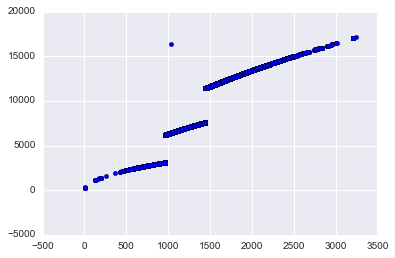

In [17]:
plt.scatter(df.var12, df.kmage_annuel);

## `crm`

In [15]:
print(df.loc[:, num_variables].corrwith(df.crm).sort_values())

kmage_annuel      -0.224395
puis_fiscale      -0.220577
var9              -0.214840
var12             -0.212965
var1              -0.089981
var3              -0.087593
var5              -0.057348
var13             -0.038970
var10             -0.026449
var15             -0.014027
var18             -0.007480
var22             -0.002629
var4              -0.000959
var19              0.000659
var20              0.002201
var21              0.003727
var17              0.003771
annee_permis       0.089981
annee_naissance    0.090048
var2               0.142801
var11              0.193985
anc_veh            0.194077
crm                1.000000
dtype: float64


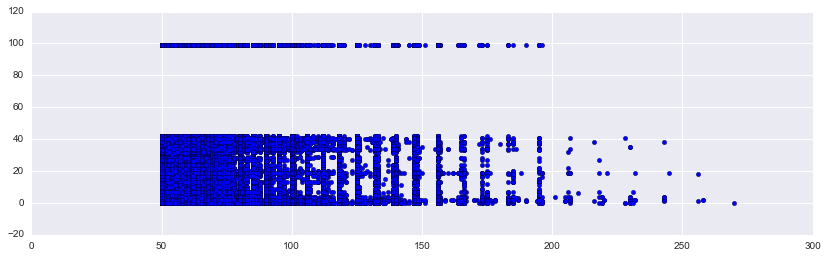

In [36]:
plt.figure(figsize = (14, 4))
plt.scatter(df.crm, df.var11);

## `var1`

In [25]:
print(df.loc[:, num_variables].corrwith(df.var1).sort_values())

annee_permis      -1.000000
annee_naissance   -0.996143
crm               -0.089981
var5              -0.052029
var11             -0.019686
anc_veh           -0.019577
var13             -0.016416
var17             -0.005102
var20             -0.003800
var21             -0.003798
var18             -0.003490
var19             -0.002769
var4              -0.001531
var22             -0.001299
var2              -0.000946
var15              0.008516
var3               0.013068
var10              0.095236
var12              0.210426
kmage_annuel       0.225365
var9               0.317586
puis_fiscale       0.397199
var1               1.000000
dtype: float64


## `var2`

In [26]:
print(df.loc[:, num_variables].corrwith(df.var2).sort_values())

var3              -0.075047
var5              -0.058773
var12             -0.029169
kmage_annuel      -0.026452
var13             -0.024901
var9              -0.020005
puis_fiscale      -0.006038
var19             -0.002665
var1              -0.000946
var20             -0.000222
var4               0.000438
var18              0.000517
var17              0.000599
annee_permis       0.000946
annee_naissance    0.001054
var21              0.002383
var22              0.004090
var10              0.012279
var15              0.023020
anc_veh            0.084763
var11              0.084833
crm                0.142801
var2               1.000000
dtype: float64


## `var3`

In [27]:
print(df.loc[:, num_variables].corrwith(df.var3).sort_values())

var11             -0.465736
anc_veh           -0.464505
crm               -0.087593
var2              -0.075047
var10             -0.015259
annee_permis      -0.013068
annee_naissance   -0.012797
var20             -0.003683
var22             -0.003142
var4              -0.002824
var19             -0.002643
var18             -0.001876
var17              0.000286
var21              0.000446
var1               0.013068
var9               0.014053
var15              0.024436
var13              0.024712
kmage_annuel       0.024888
var12              0.026255
puis_fiscale       0.030855
var5               0.096293
var3               1.000000
dtype: float64


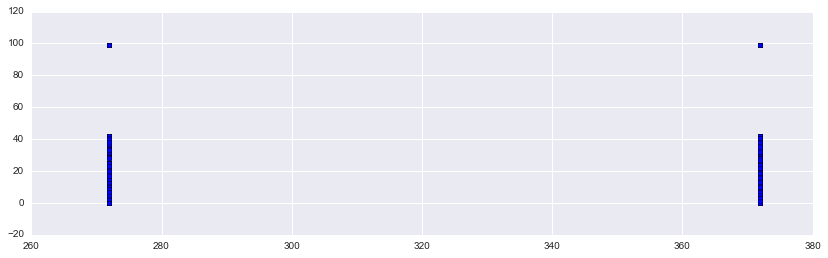

In [28]:
plt.figure(figsize = (14, 4))
plt.scatter(df.var3, df.var11);

## `var4`

In [12]:
print(df.loc[:, num_variables].corrwith(df.var4).sort_values())

var10             -0.003256
var3              -0.002824
var15             -0.002747
var18             -0.002051
var21             -0.001894
var1              -0.001531
crm               -0.000959
var20             -0.000943
puis_fiscale      -0.000201
var5               0.000077
var9               0.000276
var22              0.000338
var2               0.000438
var19              0.000607
var13              0.001447
annee_permis       0.001531
kmage_annuel       0.001566
annee_naissance    0.001607
anc_veh            0.001718
var11              0.001792
var17              0.001802
var12              0.001910
var4               1.000000
dtype: float64


## `var5`

In [13]:
print(df.loc[:, num_variables].corrwith(df.var5).sort_values())

puis_fiscale      -0.136142
kmage_annuel      -0.128672
var12             -0.121272
var9              -0.108052
var2              -0.058773
crm               -0.057348
var11             -0.053142
anc_veh           -0.053058
var1              -0.052029
var10             -0.017428
var18             -0.002340
var19             -0.001353
var20             -0.000670
var22             -0.000656
var17             -0.000647
var4               0.000077
var21              0.002559
var13              0.006321
var15              0.012205
annee_permis       0.052029
annee_naissance    0.052380
var3               0.096293
var5               1.000000
dtype: float64


## `var9`

In [17]:
print(df.loc[:, num_variables].corrwith(df.var9).sort_values())

annee_naissance   -0.318818
annee_permis      -0.317586
crm               -0.214840
var5              -0.108052
var11             -0.045272
anc_veh           -0.045246
var2              -0.020005
var21             -0.005789
var18             -0.005491
var20             -0.004579
var19             -0.002057
var22              0.000024
var4               0.000276
var17              0.004255
var15              0.004347
var13              0.011755
var3               0.014053
var1               0.317586
var12              0.452756
kmage_annuel       0.548149
var10              0.560938
puis_fiscale       0.803391
var9               1.000000
dtype: float64


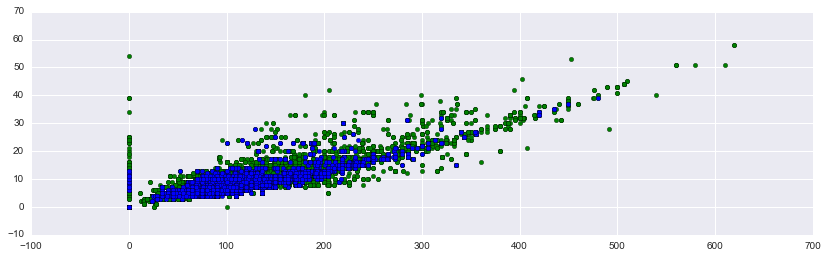

In [34]:
plt.figure(figsize = (14, 4))
plt.scatter(X.var9, X.puis_fiscale, c = 'g');
plt.scatter(X_test.var9, X_test.puis_fiscale);

## `var10`

In [28]:
print(df.loc[:, num_variables].corrwith(df.var10).sort_values())

var12             -0.184003
annee_naissance   -0.095516
annee_permis      -0.095236
var13             -0.031871
kmage_annuel      -0.028794
crm               -0.026449
var5              -0.017428
var3              -0.015259
var15             -0.014382
var20             -0.004418
var4              -0.003256
var11             -0.001958
anc_veh           -0.001946
var19             -0.001632
var21              0.000028
var22              0.001372
var18              0.001457
var17              0.007154
var2               0.012279
var1               0.095236
puis_fiscale       0.257218
var9               0.560938
var10              1.000000
dtype: float64


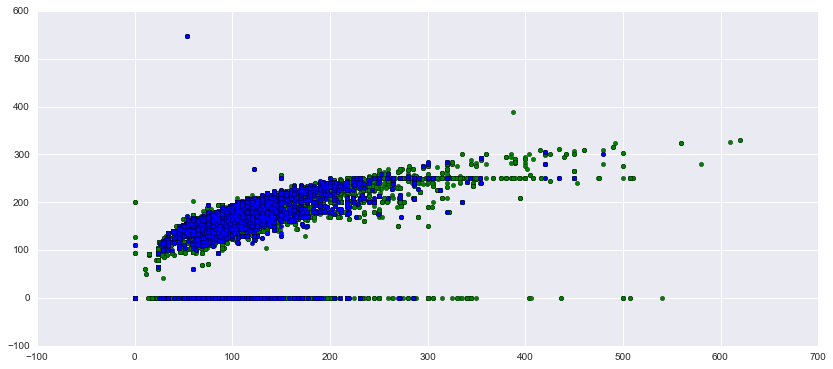

In [32]:
plt.figure(figsize = (14, 6))
plt.scatter(X.var9, X.var10, c='g');
plt.scatter(X_test.var9, X_test.var10);

In [35]:
df[df.var10 == 0]

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
161,1971.0,1991.0,PEUGEOT,8,2,1034,gazole,12398,100,"enseignant, formateur, chercheur",...,5,N,2,1,2,23,1,1,1,0
213,1987.0,2006.0,TOYOTA,5,2,1034,gazole,17000,50,"enseignant, formateur, chercheur",...,5,N,2,1,1,33,2,1,1,0
376,1975.0,1995.0,MERCEDES,8,2,1034,gazole,17000,100,"enseignant, formateur, chercheur",...,5,N,2,1,1,25,0,0,1,4
438,1985.0,2005.0,DAIHATSU,11,4,1034,gazole,17000,50,"enseignant, formateur, chercheur",...,3,N,2,1,1,22,0,0,1,1
575,1989.0,2008.0,OPEL,6,1,1034,gazole,6936,52,"enseignant, formateur, chercheur",...,3,N,2,1,1,21,0,1,1,2
603,1982.0,2001.0,KIA,8,4,1034,gazole,17000,62,"enseignant, formateur, chercheur",...,5,N,0,1,1,35,0,1,1,1
616,1979.0,1998.0,OPEL,8,2,1034,gazole,12531,100,"enseignant, formateur, chercheur",...,5,N,1,1,1,32,0,1,1,2
645,1981.0,2000.0,CITROEN,3,4,1034,essence,17000,100,"enseignant, formateur, chercheur",...,5,N,2,1,1,25,0,1,1,9
657,1983.0,2002.0,MINI,7,1,1034,essence,6855,56,"enseignant, formateur, chercheur",...,2,N,3,1,4,23,3,1,1,0


## `var11`

In [19]:
print(df.loc[:, num_variables].corrwith(df.var11).sort_values())

var3              -0.465736
var15             -0.086801
var5              -0.053142
puis_fiscale      -0.048911
kmage_annuel      -0.046971
var12             -0.045596
var9              -0.045272
var13             -0.023467
var1              -0.019686
var17             -0.006555
var10             -0.001958
var19             -0.000497
var4               0.001792
var21              0.002691
var22              0.004644
var18              0.006430
var20              0.007909
annee_naissance    0.019483
annee_permis       0.019686
var2               0.084833
crm                0.193985
anc_veh            0.999000
var11              1.000000
dtype: float64


## `var12`

In [20]:
print(df.loc[:, num_variables].corrwith(df.var12).sort_values())

crm               -0.212965
annee_naissance   -0.211251
annee_permis      -0.210426
var10             -0.184003
var5              -0.121272
anc_veh           -0.045668
var11             -0.045596
var2              -0.029169
var18             -0.003564
var21             -0.003025
var17             -0.000107
var19              0.000134
var22              0.000218
var4               0.001910
var20              0.002412
var3               0.026255
var15              0.047165
var13              0.192452
var1               0.210426
var9               0.452756
puis_fiscale       0.502540
kmage_annuel       0.908860
var12              1.000000
dtype: float64


## `var13`

In [21]:
print(df.loc[:, num_variables].corrwith(df.var13).sort_values())

puis_fiscale      -0.049966
crm               -0.038970
var10             -0.031871
var2              -0.024901
anc_veh           -0.023700
var11             -0.023467
var1              -0.016416
var22              0.000250
var21              0.000501
var20              0.001265
var4               0.001447
var19              0.001594
var17              0.002503
var18              0.004957
var5               0.006321
var9               0.011755
annee_permis       0.016416
annee_naissance    0.016517
var3               0.024712
var15              0.076567
var12              0.192452
kmage_annuel       0.211771
var13              1.000000
dtype: float64


## `var15`

In [23]:
print(df.loc[:, num_variables].corrwith(df.var15).sort_values())

anc_veh           -0.087719
var11             -0.086801
var18             -0.015738
var10             -0.014382
crm               -0.014027
annee_permis      -0.008516
annee_naissance   -0.008414
var22             -0.006428
var20             -0.004051
var4              -0.002747
var19             -0.002131
var21             -0.000683
var17              0.001716
var9               0.004347
var1               0.008516
var5               0.012205
puis_fiscale       0.020973
var2               0.023020
var3               0.024436
var12              0.047165
kmage_annuel       0.057796
var13              0.076567
var15              1.000000
dtype: float64


## `var16`

## `var17`

In [25]:
print(df.loc[:, num_variables].corrwith(df.var17).sort_values())

var18             -0.039319
var11             -0.006555
anc_veh           -0.006501
var1              -0.005102
var5              -0.000647
var12             -0.000107
var3               0.000286
var2               0.000599
kmage_annuel       0.000751
puis_fiscale       0.001691
var15              0.001716
var4               0.001802
var13              0.002503
crm                0.003771
var9               0.004255
annee_naissance    0.004960
annee_permis       0.005102
var10              0.007154
var19              0.039151
var20              0.047415
var21              0.060608
var22              0.078636
var17              1.000000
dtype: float64


## `var18`

In [26]:
print(df.loc[:, num_variables].corrwith(df.var18).sort_values())

var17             -0.039319
var15             -0.015738
crm               -0.007480
var9              -0.005491
kmage_annuel      -0.005235
var12             -0.003564
var1              -0.003490
var5              -0.002340
puis_fiscale      -0.002109
var4              -0.002051
var3              -0.001876
var2               0.000517
var10              0.001457
annee_permis       0.003490
annee_naissance    0.003789
var13              0.004957
anc_veh            0.006293
var11              0.006430
var19              0.016685
var21              0.075590
var22              0.082941
var20              0.101007
var18              1.000000
dtype: float64


## `var19`

In [11]:
print(df.loc[:, num_variables].corrwith(df.var19).sort_values())

var22             -0.436187
var1              -0.002769
var2              -0.002665
var3              -0.002643
puis_fiscale      -0.002368
var15             -0.002131
var9              -0.002057
var10             -0.001632
var5              -0.001353
var11             -0.000497
anc_veh           -0.000468
kmage_annuel       0.000025
var12              0.000134
var4               0.000607
crm                0.000659
var13              0.001594
annee_naissance    0.002739
annee_permis       0.002769
var18              0.016685
var21              0.032210
var17              0.039151
var20              0.081315
var19              1.000000
dtype: float64


## `var20`

In [10]:
print(df.loc[:, num_variables].corrwith(df.var20).sort_values())

var9              -0.004579
var10             -0.004418
var15             -0.004051
var1              -0.003800
var3              -0.003683
puis_fiscale      -0.002763
var4              -0.000943
var5              -0.000670
var2              -0.000222
var13              0.001265
kmage_annuel       0.001346
crm                0.002201
var12              0.002412
annee_naissance    0.003463
annee_permis       0.003800
anc_veh            0.007906
var11              0.007909
var17              0.047415
var19              0.081315
var18              0.101007
var22              0.108910
var21              0.273292
var20              1.000000
dtype: float64


## `var21`

In [9]:
print(df.loc[:, num_variables].corrwith(df.var21).sort_values())

var9              -0.005789
puis_fiscale      -0.004814
var1              -0.003798
var12             -0.003025
kmage_annuel      -0.002637
var4              -0.001894
var15             -0.000683
var10              0.000028
var3               0.000446
var13              0.000501
var2               0.002383
var5               0.002559
anc_veh            0.002668
var11              0.002691
crm                0.003727
annee_permis       0.003798
annee_naissance    0.003881
var19              0.032210
var22              0.049488
var17              0.060608
var18              0.075590
var20              0.273292
var21              1.000000
dtype: float64


## `var22`

In [8]:
print(df.loc[:, num_variables].corrwith(df.var22).sort_values())

var19             -0.436187
var15             -0.006428
var3              -0.003142
crm               -0.002629
var1              -0.001299
puis_fiscale      -0.000959
var5              -0.000656
kmage_annuel      -0.000589
var9               0.000024
var12              0.000218
var13              0.000250
var4               0.000338
annee_naissance    0.001245
annee_permis       0.001299
var10              0.001372
var2               0.004090
anc_veh            0.004622
var11              0.004644
var21              0.049488
var17              0.078636
var18              0.082941
var20              0.108910
var22              1.000000
dtype: float64
